#  Hotels EDA <br>
<p><img src="" alt="" width="600px"></p>




### Importing Required Libraries

In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### **Step1**: Acquire
<pre><b> • Explore problem<b> </pre>
<pre><b> • Identify data<b> </pre>
<pre><b> • Import data<b> </pre>

### **Data**
#### <pre><b>• Import and read the data</pre>

In [238]:
df=pd.read_excel('Hotels.xlsx')
df.head()

,Code,Hotel Name,Roomnights,Sale,Cost,Date
0,CODE|87851,Best Western Premier Al Ahsa Grand Hotel & Suites,57,1140,1140,"01, 2019"
1,CODE|87816,Best Western Premier Airporthotel Fontane Berlin,1935,50310,38700,"08, 2019"
2,CODE|87781,Best Western Premier Agung Resort Ubud,1897,37940,34146,"01, 2019"
3,CODE|87746,Best Western Posada Freeman,1294,38820,25880,"06, 2019"
4,CODE|87711,Best Western Pony Soldier Inn & Suites,828,22356,13248,"12, 2019"


In [239]:
df.describe()

,Roomnights,Sale,Cost
count,2509.000000,2509.000000,2509.000000
mean,1000.293344,25067.133121,17548.681148
std,575.654901,14896.844284,10294.119112
min,1.000000,28.000000,16.000000
25%,502.000000,12425.000000,8672.000000
50%,1002.000000,24648.000000,17480.000000
75%,1500.000000,37044.000000,25965.000000
max,1999.000000,59130.000000,39720.000000


### **Step2**: Prepare & Preprocessing
<pre><b> • Explore data<b> </pre>
<pre><b> • Visualize ideas<b> </pre>
<pre><b> • Cleaning data<b> </pre>


In [240]:
df.isna().sum()

Code          0
Hotel Name    0
Roomnights    0
Sale          0
Cost          0
Date          0
dtype: int64

In [241]:
#Edit code column 
for i in range(len(df['Code'])): 
    df['Code'][i]=int(df['Code'][i].split('|')[1])
df.head()

,Code,Hotel Name,Roomnights,Sale,Cost,Date
0,87851,Best Western Premier Al Ahsa Grand Hotel & Suites,57,1140,1140,"01, 2019"
1,87816,Best Western Premier Airporthotel Fontane Berlin,1935,50310,38700,"08, 2019"
2,87781,Best Western Premier Agung Resort Ubud,1897,37940,34146,"01, 2019"
3,87746,Best Western Posada Freeman,1294,38820,25880,"06, 2019"
4,87711,Best Western Pony Soldier Inn & Suites,828,22356,13248,"12, 2019"


In [242]:
#Cluster the data by room nights into three categories: high demand, mid demand, and low demand 
l=[]
for i in range(len(df['Roomnights'])): 
    if df['Roomnights'][i]<int(df['Roomnights'].describe()['mean']):l.append('Low')
    elif df['Roomnights'][i]>int(df['Roomnights'].describe()['mean']):l.append('High')
    elif df['Roomnights'][i]==int(df['Roomnights'].describe()['mean']):l.append('Mid')
df['Roomnights Class']=l
df.head()

,Code,Hotel Name,Roomnights,Sale,Cost,Date,Roomnights Class
0,87851,Best Western Premier Al Ahsa Grand Hotel & Suites,57,1140,1140,"01, 2019",Low
1,87816,Best Western Premier Airporthotel Fontane Berlin,1935,50310,38700,"08, 2019",High
2,87781,Best Western Premier Agung Resort Ubud,1897,37940,34146,"01, 2019",High
3,87746,Best Western Posada Freeman,1294,38820,25880,"06, 2019",High
4,87711,Best Western Pony Soldier Inn & Suites,828,22356,13248,"12, 2019",Low


In [243]:
df[df.duplicated()==True]

,Code,Hotel Name,Roomnights,Sale,Cost,Date,Roomnights Class
32,86766,Best Western Plus Suites Hotel,1302,26040,19530,"09, 2019",High
34,86731,Best Western Plus Suitcase Paris La Défense,1900,45600,30400,"05, 2019",High
36,86696,Best Western Plus Stovall's Inn,1313,38077,23634,"02, 2019",High
164,82251,BEST WESTERN PLUS Executive Hotel and Suites,793,18239,15067,"02, 2019",Low
166,82216,Best Western Plus Executive Court Inn & Confer...,435,9570,8700,"05, 2019",Low
2232,9556,AC Hotel Paris Porte Maillot,473,12771,8041,"07, 2019",Low
2234,9521,AC Hotel Palencia,194,5820,2910,"10, 2019",Low
2236,9486,AC Hotel Palau de Bellavista,759,18975,12903,"11, 2019",Low
2481,946,Conrad Koh Samui Residences,1100,29700,20900,"02, 2019",High


In [244]:
#Remove duplicated columns
df.drop_duplicates(inplace=True)

In [245]:
df.duplicated().sum()

0

In [246]:
df.shape

(2500, 7)

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2508
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Code              2500 non-null   object
 1   Hotel Name        2500 non-null   object
 2   Roomnights        2500 non-null   int64 
 3   Sale              2500 non-null   int64 
 4   Cost              2500 non-null   int64 
 5   Date              2500 non-null   object
 6   Roomnights Class  2500 non-null   object
dtypes: int64(3), object(4)
memory usage: 156.2+ KB


In [248]:
#Convert Date column dtype into Date Time
df['Date']=pd.to_datetime(df['Date'])
df['Date']=df['Date'].dt.date.apply(lambda x: x.strftime('%Y-%m'))
df.head()

,Code,Hotel Name,Roomnights,Sale,Cost,Date,Roomnights Class
0,87851,Best Western Premier Al Ahsa Grand Hotel & Suites,57,1140,1140,2019-01,Low
1,87816,Best Western Premier Airporthotel Fontane Berlin,1935,50310,38700,2019-08,High
2,87781,Best Western Premier Agung Resort Ubud,1897,37940,34146,2019-01,High
3,87746,Best Western Posada Freeman,1294,38820,25880,2019-06,High
4,87711,Best Western Pony Soldier Inn & Suites,828,22356,13248,2019-12,Low


In [249]:
df['Cost of Sales']=df['Sale']-df['Cost']
df.head()

,Code,Hotel Name,Roomnights,Sale,Cost,Date,Roomnights Class,Cost of Sales
0,87851,Best Western Premier Al Ahsa Grand Hotel & Suites,57,1140,1140,2019-01,Low,0
1,87816,Best Western Premier Airporthotel Fontane Berlin,1935,50310,38700,2019-08,High,11610
2,87781,Best Western Premier Agung Resort Ubud,1897,37940,34146,2019-01,High,3794
3,87746,Best Western Posada Freeman,1294,38820,25880,2019-06,High,12940
4,87711,Best Western Pony Soldier Inn & Suites,828,22356,13248,2019-12,Low,9108


### **Step3**: Analyze
<pre><b> • Analyze data<b> </pre>
<pre><b> • Visualize results<b> </pre>

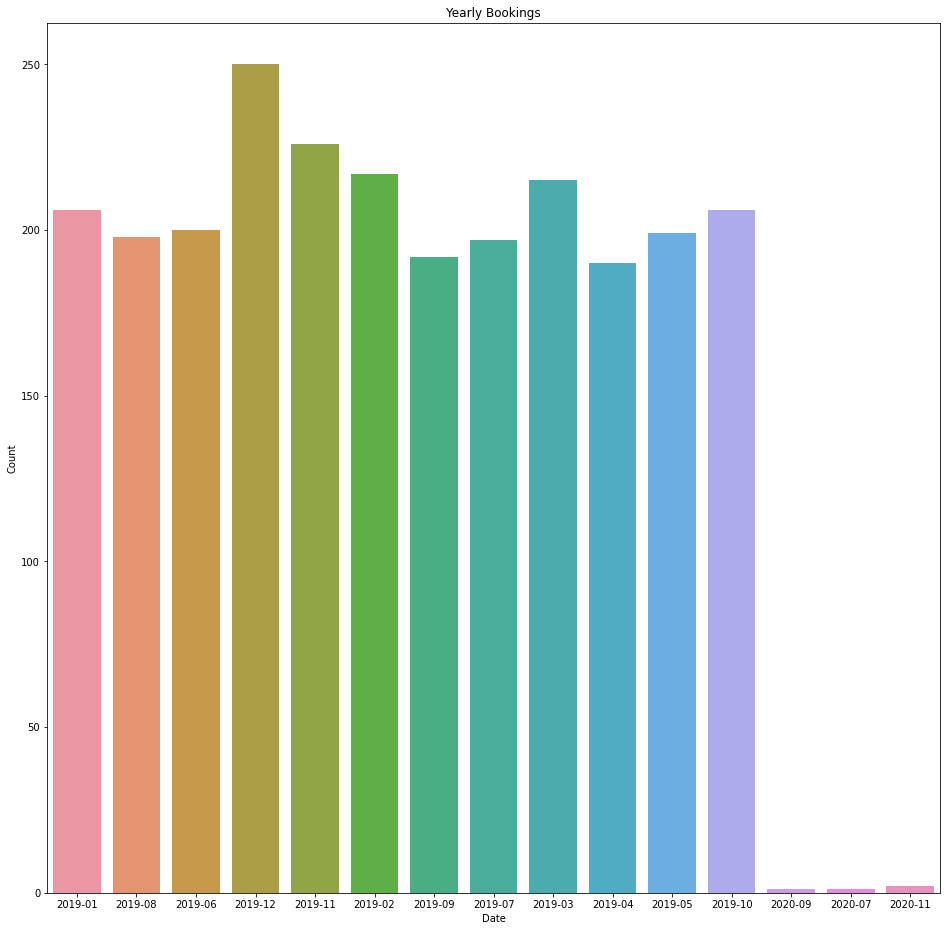

In [250]:
plt.figure(figsize=(16,16))
sns.countplot(df['Date'])
plt.xlabel('Date');plt.ylabel('Count');plt.title('Yearly Bookings')
plt.show()

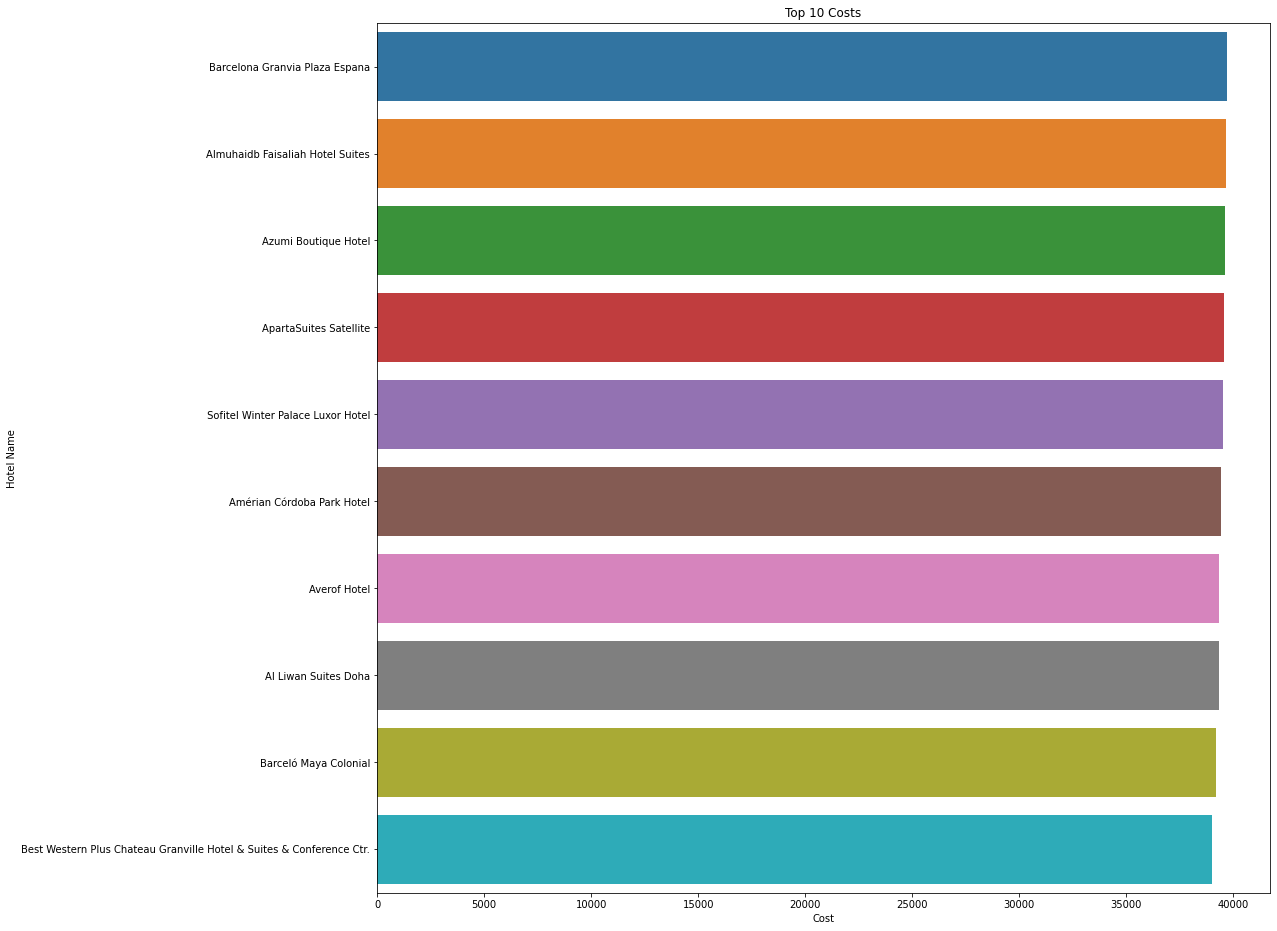

In [251]:
plt.figure(figsize=(16,16))
part_df=df.sort_values('Cost',ascending=False).head(10)
sns.barplot(x=part_df['Cost'],y=part_df['Hotel Name'])
plt.xlabel('Cost');plt.ylabel('Hotel Name')
plt.title('Top 10 Costs')
plt.show()

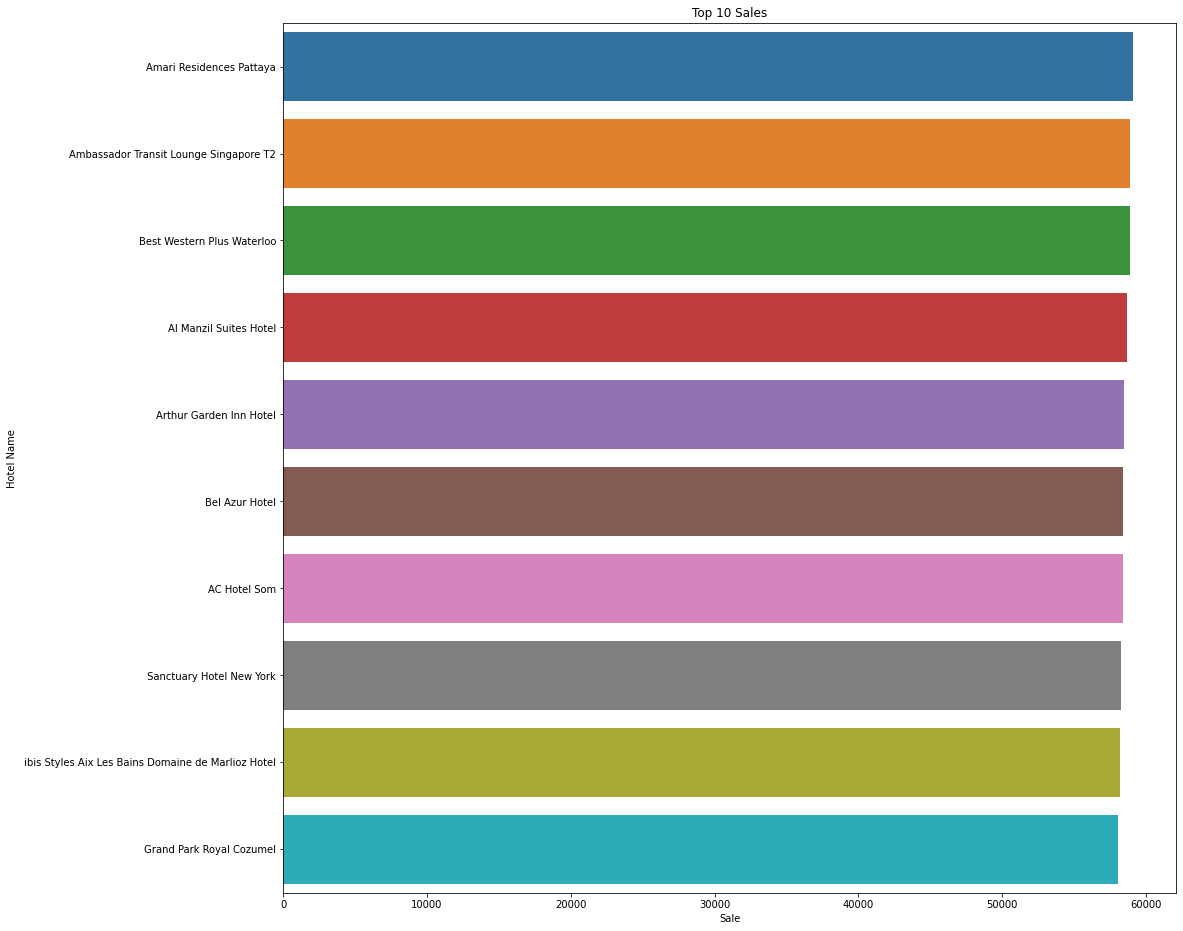

In [252]:
plt.figure(figsize=(16,16))
part_df=df.sort_values('Sale',ascending=False).head(10)
sns.barplot(x=part_df['Sale'],y=part_df['Hotel Name'])
plt.xlabel('Sale');plt.ylabel('Hotel Name')
plt.title('Top 10 Sales')
plt.show()

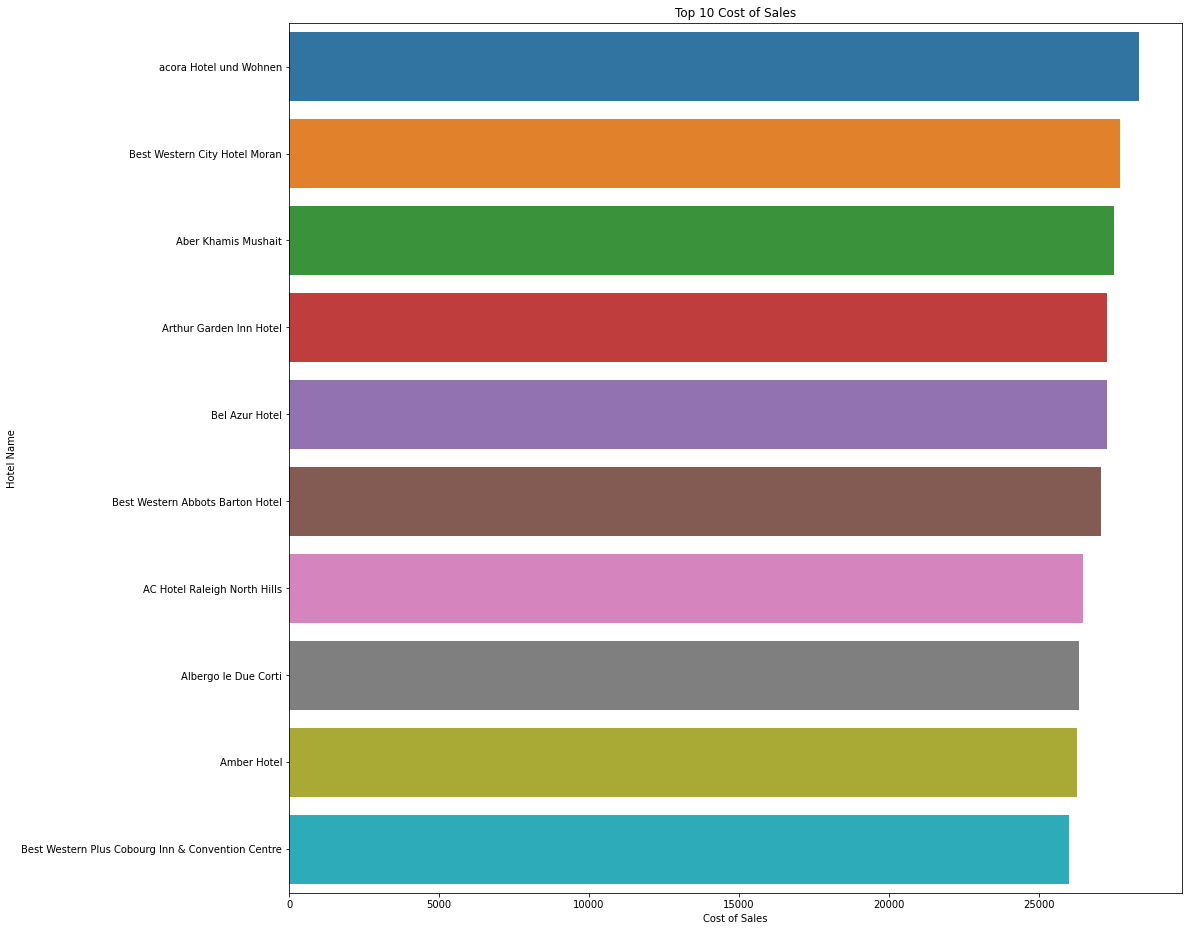

In [253]:
plt.figure(figsize=(16,16))
part_df=df.sort_values('Cost of Sales',ascending=False).head(10)
sns.barplot(x=part_df['Cost of Sales'],y=part_df['Hotel Name'])
plt.xlabel('Cost of Sales');plt.ylabel('Hotel Name')
plt.title('Top 10 Cost of Sales')
plt.show()

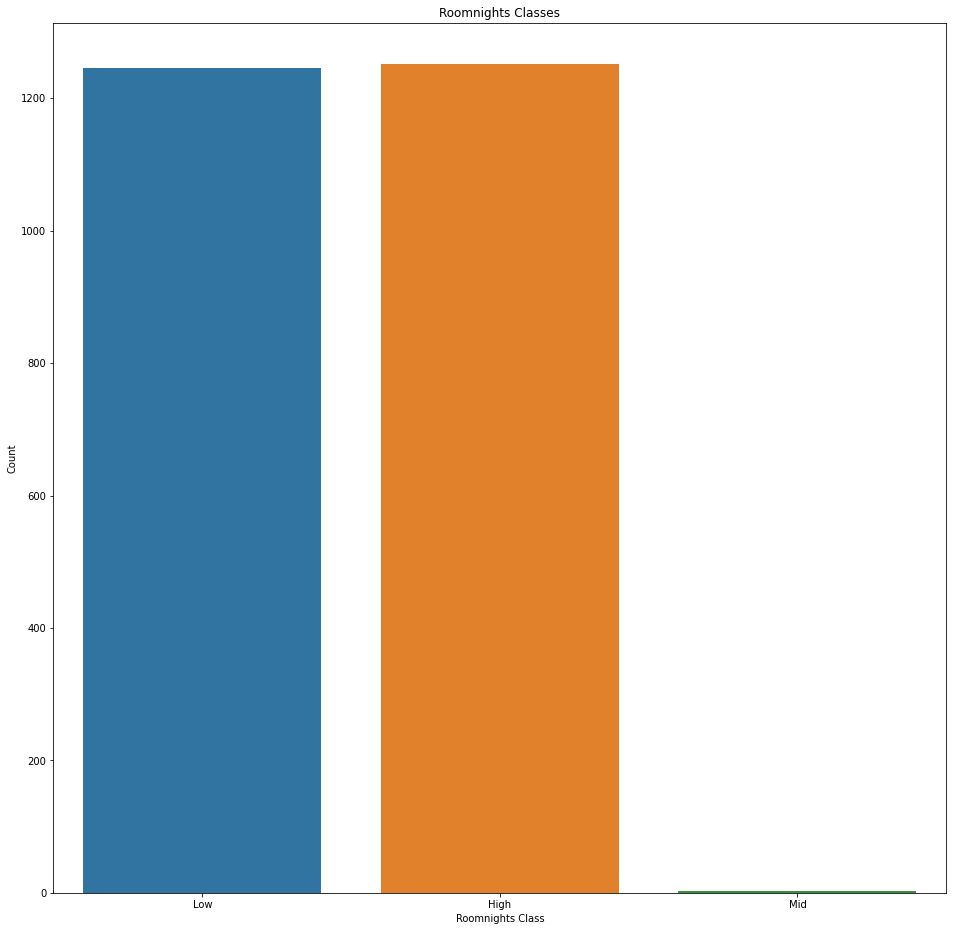

In [254]:
plt.figure(figsize=(16,16))
sns.countplot(df['Roomnights Class'])
plt.xlabel('Roomnights Class');plt.ylabel('Count');plt.title('Roomnights Classes')
plt.show()

In [255]:
#Final Hotels.xlsx
df.to_excel('Hotels Dataset.xlsx',index=False)